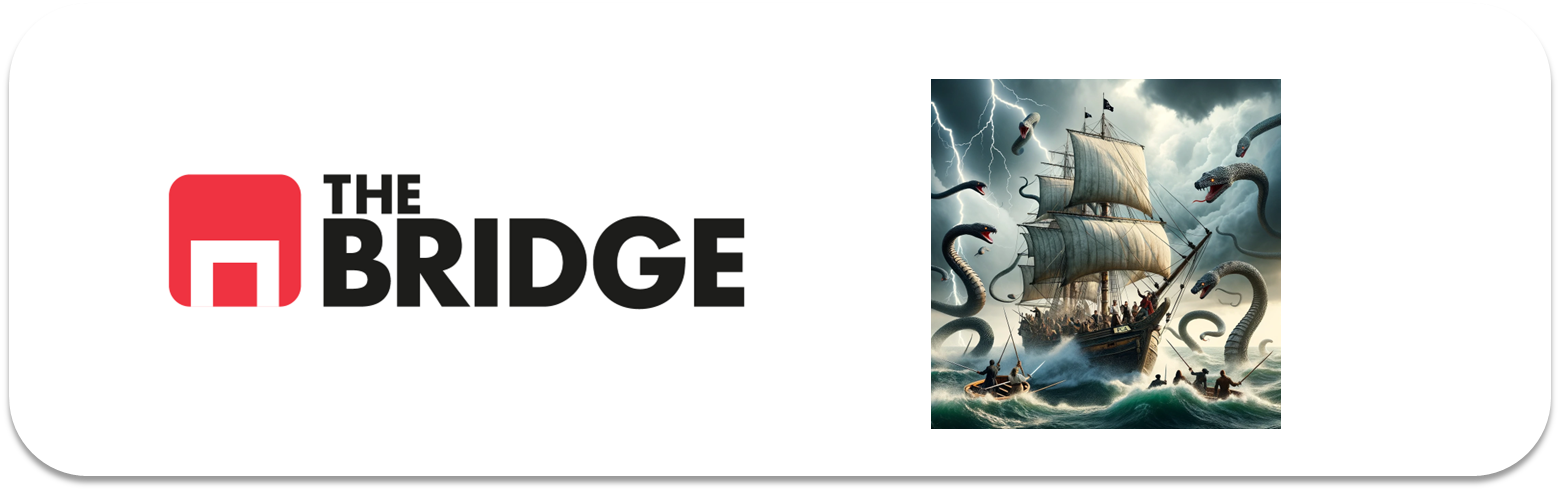

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [44]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Carga de datos
# ==============================================================================
data = pd.read_csv('data/credit_npo.csv' )

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import bootcampviztools as bt
from bootcampviztools import *

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, SelectFromModel, RFE
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


## 1. Preparar los Datos

Cargar el Dataset y eliminar filas con valores nulos

In [2]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [6]:
target = 'SeriousDlqin2yrs'

Hago el Train y test

In [7]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state= 42)

In [8]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,9452.0,0.070144,0.255403,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,9452.0,0.335207,0.362233,0.0,0.034869,0.179211,0.587533,6.0
age,9452.0,51.491536,14.499298,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,9452.0,0.343314,2.930489,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,9452.0,0.486047,2.505031,0.0,0.146204,0.297564,0.477876,96.0
MonthlyIncome,9452.0,6868.428058,12580.543336,0.0,3466.000000,5441.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,9452.0,8.794647,5.139555,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,9452.0,0.180279,2.889984,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,9452.0,1.064325,1.148156,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,9452.0,0.152772,2.870119,0.0,0.000000,0.000000,0.000000,98.0


In [9]:
features_num_0 = ["RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome",
                "NumberOfOpenCreditLinesAndLoans", "NumberOfDependents", "NumberRealEstateLoansOrLines"]

(10, 2)


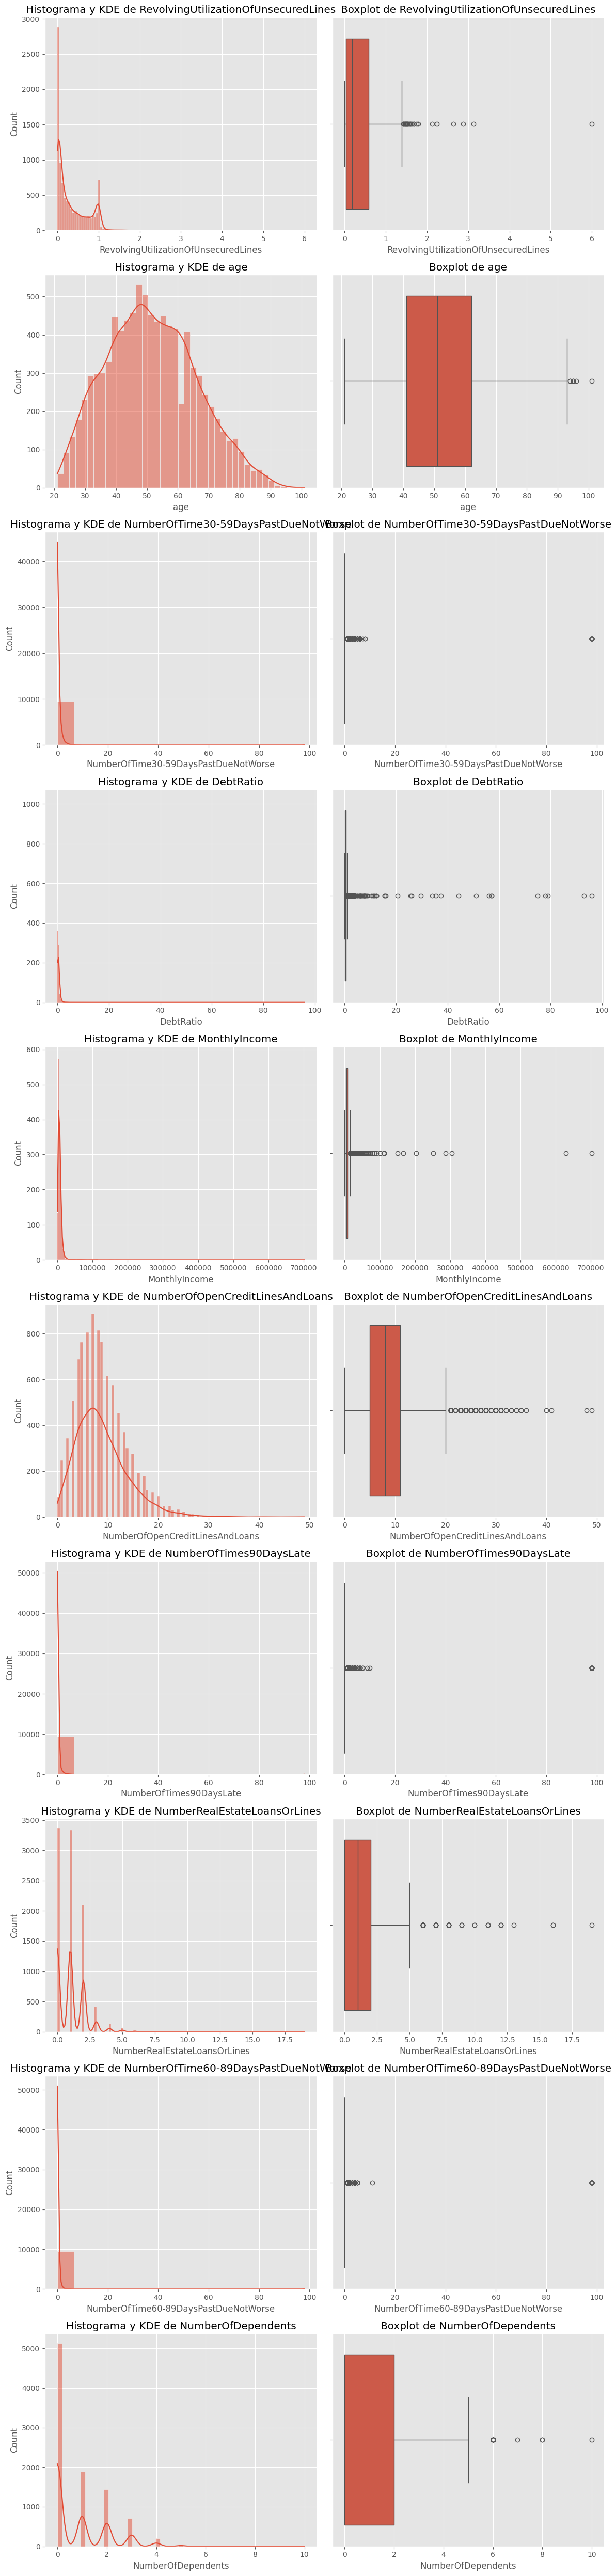

In [10]:
bt.plot_combined_graphs(train_set, [col for col in train_set.columns if col != target])

In [11]:
train_set['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0     0.831147
1     0.113521
2     0.033644
3     0.010897
4     0.005607
5     0.002116
6     0.001904
98    0.000846
8     0.000212
7     0.000106
Name: proportion, dtype: float64

In [12]:
train_set['NumberOfTimes90DaysLate'].value_counts(True)

NumberOfTimes90DaysLate
0     0.943610
1     0.033115
2     0.012590
3     0.004655
4     0.002751
5     0.001481
98    0.000846
6     0.000529
7     0.000212
9     0.000106
10    0.000106
Name: proportion, dtype: float64

In [13]:
train_set['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(True)

NumberOfTime60-89DaysPastDueNotWorse
0     0.947207
1     0.040521
2     0.008041
3     0.001481
4     0.001375
98    0.000846
5     0.000423
11    0.000106
Name: proportion, dtype: float64

Convertir las Features NumberOf... a Categóricas con 2 niveles

En un principio las converti a categoricas (alto y bajo), pero tenía problemas avanzando con los modelos así que decidí conservar el tipo numérico aunque las considere categóricas.

In [14]:
columns_to_convert = [col for col in data.columns if col.startswith('NumberOfTime')]

# Definir una función para convertir valores numéricos a categóricos en dos niveles
def convert_to_categorical(value, threshold):
    return 1 if value > threshold else 0

umbral = 0  # para intentar agrupar lo maximo posible en el segundo grupo

for col in columns_to_convert:
    train_set[col] = train_set[col].apply(lambda x: convert_to_categorical(x, umbral))
    test_set[col] = test_set[col].apply(lambda x: convert_to_categorical(x, umbral))

In [15]:
train_set['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0    0.831147
1    0.168853
Name: proportion, dtype: float64

In [16]:
train_set['NumberOfTimes90DaysLate'].value_counts(True)

NumberOfTimes90DaysLate
0    0.94361
1    0.05639
Name: proportion, dtype: float64

In [17]:
train_set['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(True)

NumberOfTime60-89DaysPastDueNotWorse
0    0.947207
1    0.052793
Name: proportion, dtype: float64

In [18]:
train_set

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11145,0,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0
2012,0,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0
5428,0,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0
12130,0,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0
36,0,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11966,0,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0
5512,0,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0
5719,0,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0
922,0,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0


In [19]:
features_cat = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

## 2. Mini EDA y Selección de Features

2.1 Análisis Visual 

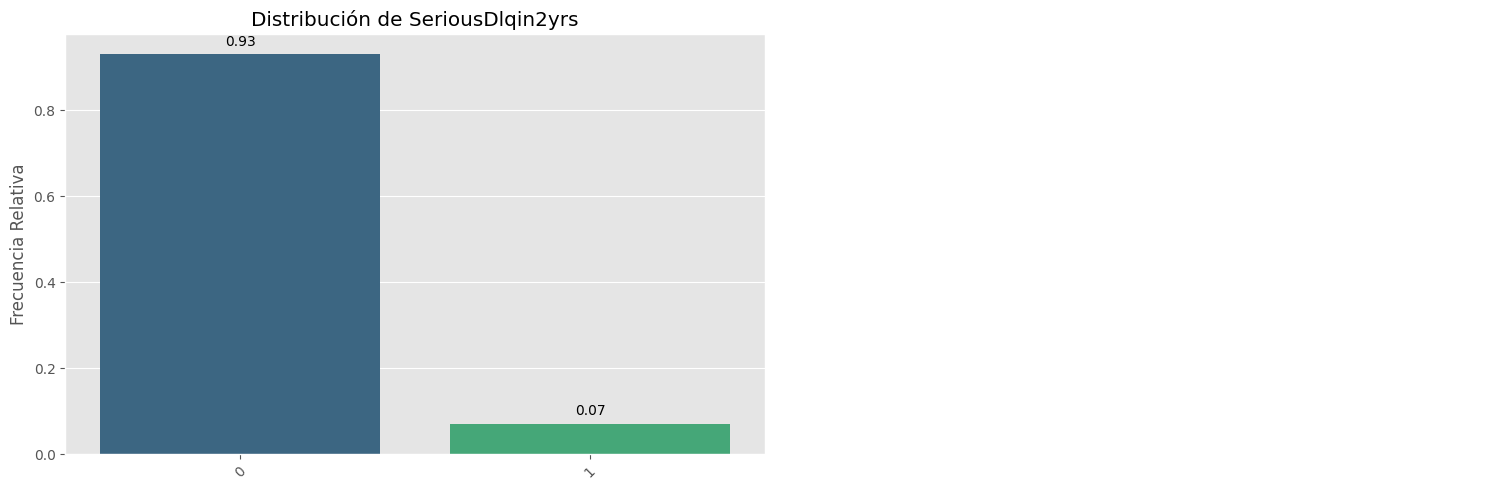

In [20]:
bt.pinta_distribucion_categoricas(train_set, [target], True, True)

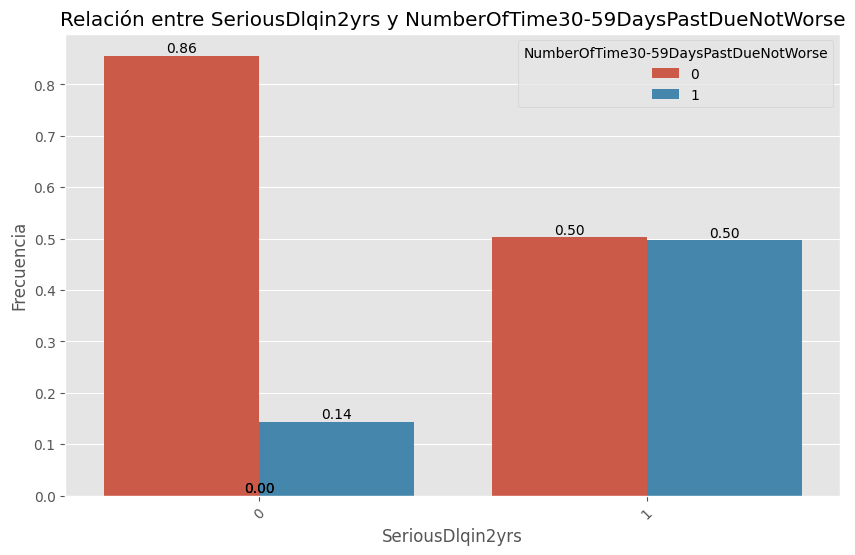

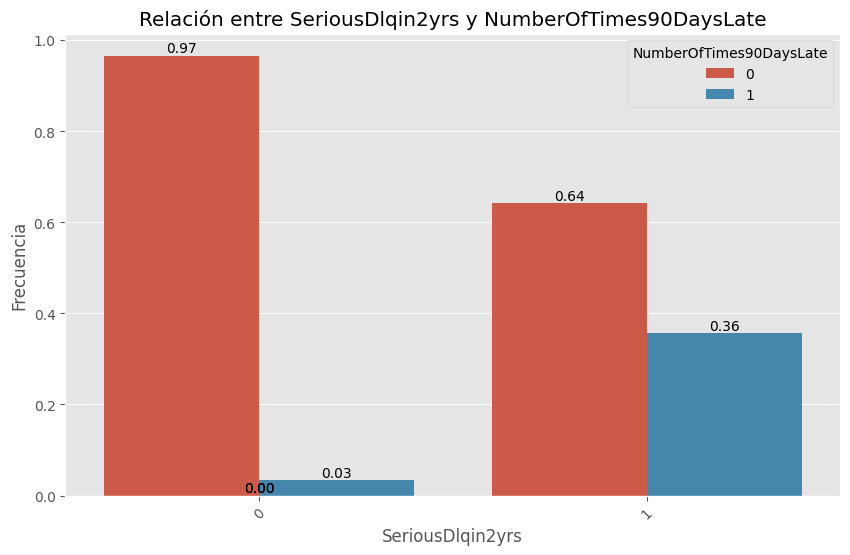

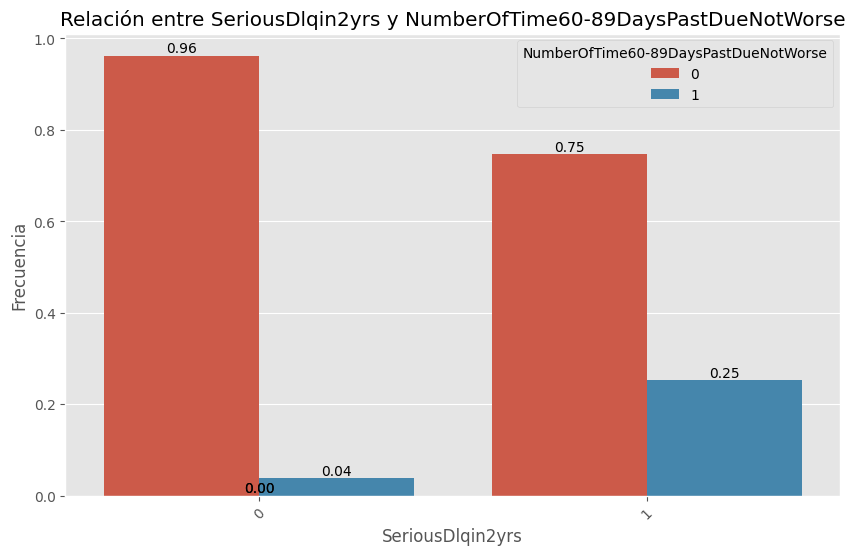

In [21]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, True, True)

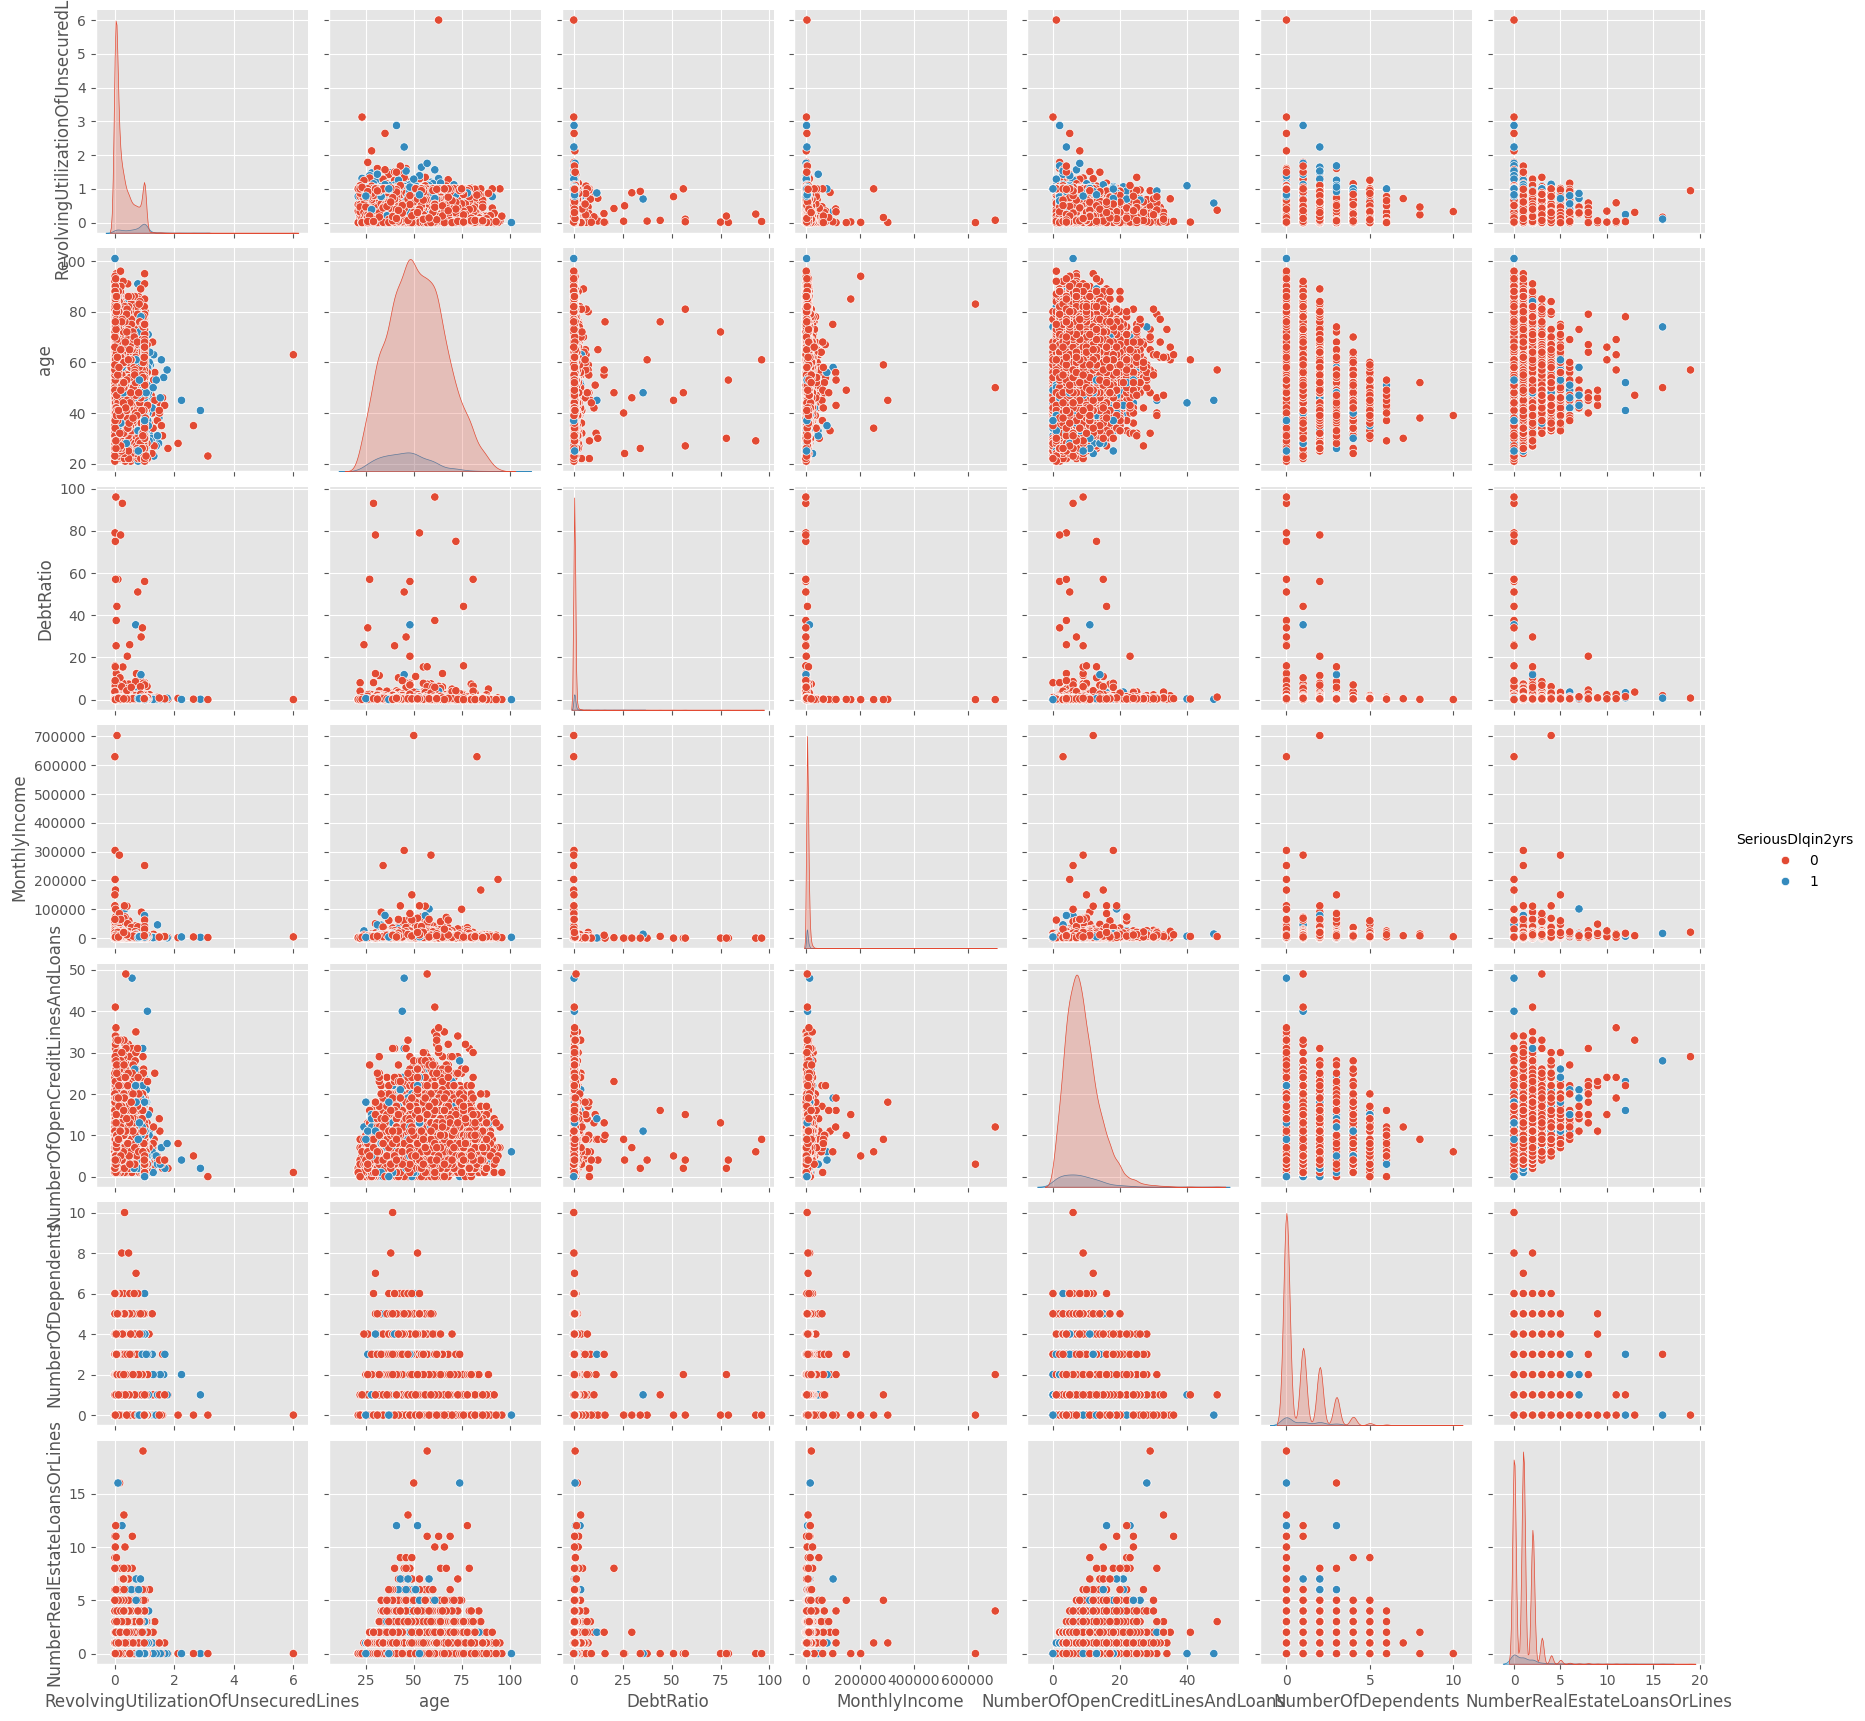

In [22]:
sns.pairplot(train_set[features_num_0 + [target]], hue = target)
plt.show()

"NumberOfDependents", "NumberOfOpenCreditsAndLoans" y "RevolvingOperationsOfUnsecuredLines", en todas ellas o hay superposición o no se ven puntos de diferenciación claros, no me las quedo. El resto las conservo, las categoricas tambien.

In [23]:
features_cat = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
features_num = ["RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome"]
features = features_cat + features_num

2.2 Selección de Features Numéricas mediante SelectKBest y ANOVA

In [42]:
X_train = train_set[features_num]
y_train = train_set[target]
y_test = train_set[target]

In [25]:
# Selección de las mejores características numéricas
selector_num = SelectKBest(score_func=f_classif, k=6)
X_best_num = selector_num.fit_transform(X_train, y_train)
selected_features_num = pd.DataFrame(X_best_num, columns = selector_num.get_feature_names_out())

print("Features seleccionadas (numéricas):" )
selected_features_num

Features seleccionadas (numéricas):


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome
0,0.391240,68.0,2.693124,2166.0
1,0.906540,59.0,0.325227,6496.0
2,0.933223,52.0,0.372442,8258.0
3,0.857859,50.0,0.511098,5225.0
4,0.000000,61.0,0.414167,5166.0
...,...,...,...,...
9447,0.397822,53.0,0.332584,11560.0
9448,0.015171,76.0,0.005427,3500.0
9449,0.988201,62.0,0.450432,8442.0
9450,0.122072,41.0,0.638133,3749.0


2.3 Selección de Features Categóricas mediante Mutual Information

In [26]:
# Selección de las mejores características categóricas
selector_cat = SelectKBest(score_func=mutual_info_classif, k=6)
X_best_cat = selector_cat.fit_transform(X_train, y_train)
selected_features_cat = pd.DataFrame(X_best_num, columns = selector_num.get_feature_names_out())

print("Features seleccionadas (categóricas):")
selected_features_cat

Features seleccionadas (categóricas):


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome
0,0.391240,68.0,2.693124,2166.0
1,0.906540,59.0,0.325227,6496.0
2,0.933223,52.0,0.372442,8258.0
3,0.857859,50.0,0.511098,5225.0
4,0.000000,61.0,0.414167,5166.0
...,...,...,...,...
9447,0.397822,53.0,0.332584,11560.0
9448,0.015171,76.0,0.005427,3500.0
9449,0.988201,62.0,0.450432,8442.0
9450,0.122072,41.0,0.638133,3749.0


2.4 Selección mediante SelectFromModel

In [27]:
model = LogisticRegression(max_iter=1000)
sfm = SelectFromModel(estimator=model, max_features = 4)
sfm.fit(train_set[features], train_set[target])
selected_features_sfm = pd.DataFrame(X_best_num, columns = selector_num.get_feature_names_out())

print("Features seleccionadas (SelectFromModel):")
selected_features_sfm

Features seleccionadas (SelectFromModel):


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome
0,0.391240,68.0,2.693124,2166.0
1,0.906540,59.0,0.325227,6496.0
2,0.933223,52.0,0.372442,8258.0
3,0.857859,50.0,0.511098,5225.0
4,0.000000,61.0,0.414167,5166.0
...,...,...,...,...
9447,0.397822,53.0,0.332584,11560.0
9448,0.015171,76.0,0.005427,3500.0
9449,0.988201,62.0,0.450432,8442.0
9450,0.122072,41.0,0.638133,3749.0


2.5 Selección mediante RFE

In [28]:
# Selección mediante RFE (Recursive Feature Elimination)
model =RandomForestClassifier(class_weight= "balanced", random_state= 42)
rfe = RFE(estimator=model, n_features_to_select=6)
rfe.fit(train_set[features],train_set[target])
selected_features_rfe = list(rfe.get_feature_names_out())

print("Features seleccionadas (RFE):", selected_features_rfe)

Features seleccionadas (RFE): ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']


2.6 Selección mediante SFS

In [29]:
# Selección mediante SFS (Sequential Feature Selection)
sfs = SFS(model,  
          n_features_to_select=6,
          scoring='balanced_accuracy',
          cv=5)
sfs.fit(train_set[features], train_set[target])
selected_features_sfs = list(sfs.get_feature_names_out())

print("Features seleccionadas (SFS):", selected_features_sfs)

Features seleccionadas (SFS): ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome']


2.7 Sistema de Hard-Voting para Selección de Features

In [30]:
# Recolectar todas las features seleccionadas
all_selected_features = list(selected_features_num) + list(selected_features_cat) + list(selected_features_sfm) + list(selected_features_rfe) + list(selected_features_sfs)

# Contar la frecuencia de cada feature
feature_counts = Counter(all_selected_features)

# Seleccionar las features más frecuentes (máximo 6)
most_common_features = [feature for feature, count in feature_counts.most_common(6)]

print("Features seleccionadas (Hard-Voting):", most_common_features)

Features seleccionadas (Hard-Voting): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'DebtRatio', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']


In [31]:
all_selected_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome']

Paso 3: Comparación de Modelos y Selección de la Mejor Combinación

Entrenar y Validar Modelos con las Diferentes Selecciones de Features

In [32]:
selected_features_sfm = list(sfm.get_feature_names_out())
selected_features_cat = list(selector_cat.get_feature_names_out())
selected_features_num = list(selector_num.get_feature_names_out())

In [33]:
# Definir modelos
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Listas de características seleccionadas
feature_sets = [
    selected_features_num,
    selected_features_cat,
    selected_features_sfm,
    selected_features_rfe,
    selected_features_sfs,
    most_common_features
]

# Evaluar cada combinación de modelo y conjunto de características
results = {}
for model_name, model in models.items():
    for i, feature_set in enumerate(feature_sets):
        X_train = train_set[feature_set]
        y_train = train_set[target]
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')
        results[f"{model_name}_set_{i+1}"] = scores.mean()

# Mostrar los resultados
for key, value in results.items():
    print(f"{key}: {value}")

RandomForest_set_1: 0.5271635498911772
RandomForest_set_2: 0.5301710686881697
RandomForest_set_3: 0.5878022337006411
RandomForest_set_4: 0.5788699570032833
RandomForest_set_5: 0.5864011893919387
RandomForest_set_6: 0.5796615989739669
SVM_set_1: 0.5
SVM_set_2: 0.5
SVM_set_3: 0.5725636040896644
SVM_set_4: 0.5
SVM_set_5: 0.5
SVM_set_6: 0.5
KNN_set_1: 0.5039271700028887
KNN_set_2: 0.5039271700028887
KNN_set_3: 0.5924084512617931
KNN_set_4: 0.5039272023778582
KNN_set_5: 0.5038134043601128
KNN_set_6: 0.5039272023778582


El mejor modelo es KNN con el conjunto de features 3

Paso 4: Optimización de Hiperparámetros y Evaluación Final

Optimización del Mejor Modelo

In [34]:
selected_features_sfm

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines']

In [41]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

X_best_train = train_set[selected_features_sfm]
X_best_test = train_set[selected_features_sfm]

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_best_train, y_train)
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [36]:
# Entrenar el mejor modelo
best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_best_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

Evaluación Final Contra el Conjunto de Prueba

In [43]:
y_pred = best_knn.predict(X_best_test)

recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Recall: 0.8431372549019608
Accuracy: 0.9860347016504444
Precision: 0.9522998296422487
F1 Score: 0.8944
Confusion Matrix:
[[8761   28]
 [ 104  559]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8789
           1       0.95      0.84      0.89       663

    accuracy                           0.99      9452
   macro avg       0.97      0.92      0.94      9452
weighted avg       0.99      0.99      0.99      9452



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.